In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import acf, pacf
import seaborn as sns
import datetime as dt

#### The data have 7 columns:
#### Symbol, Y-M-D, Time, Open, High, Low, Close values for every minute.

In [190]:
df_13= pd.read_csv(r"D:\Datasets\trading dataset\nifty2_2013.txt",names= ['Symbol', 'Y-M-D', 'Time', 'Open', 'High', 'Low', 'Close'], index_col=False)


C:\Users\varsha\AppData\Local\Temp\ipykernel_15376\114772563.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df_13= pd.read_csv(r"D:\Datasets\trading dataset\nifty2_2013.txt",names= ['Symbol', 'Y-M-D', 'Time', 'Open', 'High', 'Low', 'Close'], index_col=False)


In [191]:
df_13.head()

,Symbol,Y-M-D,Time,Open,High,Low,Close
0,NIFTY,20130603,09:16,6005.90,6011.00,5985.00,5985.65
1,NIFTY,20130603,09:17,5985.45,5988.40,5978.75,5981.40
2,NIFTY,20130603,09:18,5980.90,5985.25,5980.60,5984.90
3,NIFTY,20130603,09:19,5985.25,5992.50,5984.60,5992.50
4,NIFTY,20130603,09:20,5992.75,5998.40,5992.40,5997.60


In [192]:
# lcheck the datatypes of all the columns in the dataframe
df_13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53922 entries, 0 to 53921
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  53922 non-null  object 
 1   Y-M-D   53922 non-null  int64  
 2   Time    53922 non-null  object 
 3   Open    53922 non-null  float64
 4   High    53922 non-null  float64
 5   Low     53922 non-null  float64
 6   Close   53922 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ MB


In [193]:
df_13.shape

(53922, 7)

In [194]:
df_13.isnull().sum()

Symbol    0
Y-M-D     0
Time      0
Open      0
High      0
Low       0
Close     0
dtype: int64

In [195]:
# convert the date year column correctly into dateTime format
df_13['date(Y/M/D)']= pd.to_datetime(df_13['Y-M-D'], format= '%Y%m%d')

In [196]:
df_13.head()

,Symbol,Y-M-D,Time,Open,High,Low,Close,date(Y/M/D)
0,NIFTY,20130603,09:16,6005.90,6011.00,5985.00,5985.65,2013-06-03
1,NIFTY,20130603,09:17,5985.45,5988.40,5978.75,5981.40,2013-06-03
2,NIFTY,20130603,09:18,5980.90,5985.25,5980.60,5984.90,2013-06-03
3,NIFTY,20130603,09:19,5985.25,5992.50,5984.60,5992.50,2013-06-03
4,NIFTY,20130603,09:20,5992.75,5998.40,5992.40,5997.60,2013-06-03


In [197]:
# lets seperate out the date, month and year sepeartely

df_13['date']= df_13['date(Y/M/D)'].dt.day
df_13['month']= df_13['date(Y/M/D)'].dt.month
df_13['year']= df_13['date(Y/M/D)'].dt.year

In [198]:
df_13.head()

,Symbol,Y-M-D,Time,Open,High,Low,Close,date(Y/M/D),date,month,year
0,NIFTY,20130603,09:16,6005.90,6011.00,5985.00,5985.65,2013-06-03,3,6,2013
1,NIFTY,20130603,09:17,5985.45,5988.40,5978.75,5981.40,2013-06-03,3,6,2013
2,NIFTY,20130603,09:18,5980.90,5985.25,5980.60,5984.90,2013-06-03,3,6,2013
3,NIFTY,20130603,09:19,5985.25,5992.50,5984.60,5992.50,2013-06-03,3,6,2013
4,NIFTY,20130603,09:20,5992.75,5998.40,5992.40,5997.60,2013-06-03,3,6,2013


In [199]:
# lets do the same for time column in hour and minutes

df_13['Time(h:m)']= pd.to_datetime(df_13['Time'], format= '%H:%M')

In [200]:
df_13.head()

,Symbol,Y-M-D,Time,Open,High,Low,Close,date(Y/M/D),date,month,year,Time(h:m)
0,NIFTY,20130603,09:16,6005.90,6011.00,5985.00,5985.65,2013-06-03,3,6,2013,1900-01-01 09:16:00
1,NIFTY,20130603,09:17,5985.45,5988.40,5978.75,5981.40,2013-06-03,3,6,2013,1900-01-01 09:17:00
2,NIFTY,20130603,09:18,5980.90,5985.25,5980.60,5984.90,2013-06-03,3,6,2013,1900-01-01 09:18:00
3,NIFTY,20130603,09:19,5985.25,5992.50,5984.60,5992.50,2013-06-03,3,6,2013,1900-01-01 09:19:00
4,NIFTY,20130603,09:20,5992.75,5998.40,5992.40,5997.60,2013-06-03,3,6,2013,1900-01-01 09:20:00


In [201]:
df_13['hour']= df_13['Time(h:m)'].dt.hour
df_13['min']= df_13['Time(h:m)'].dt.minute


In [202]:
# drop the unwanted columns
df_13.drop(labels='Y-M-D', inplace= True, axis= 1)
df_13.drop(labels='Time(h:m)', inplace= True, axis= 1)

In [203]:
df_13.head()

,Symbol,Time,Open,High,Low,Close,date(Y/M/D),date,month,year,hour,min
0,NIFTY,09:16,6005.90,6011.00,5985.00,5985.65,2013-06-03,3,6,2013,9,16
1,NIFTY,09:17,5985.45,5988.40,5978.75,5981.40,2013-06-03,3,6,2013,9,17
2,NIFTY,09:18,5980.90,5985.25,5980.60,5984.90,2013-06-03,3,6,2013,9,18
3,NIFTY,09:19,5985.25,5992.50,5984.60,5992.50,2013-06-03,3,6,2013,9,19
4,NIFTY,09:20,5992.75,5998.40,5992.40,5997.60,2013-06-03,3,6,2013,9,20


In [204]:
# lets create the copy of the original dataframe and delete the other unwanted columns too

df_copy= df_13.copy()

In [205]:
# df_copy.drop(labels= ['Time', 'date(Y/M/D)'], axis= 1, inplace= True)

# we can drop the Symbol column too as all the Symbols are having value as Nifty, even delete the year column as we know
# all the data is for 2013 year
df_copy.drop(labels= ['Symbol', 'year'], inplace= True, axis= 1)

In [206]:
df_copy.head()

,Time,Open,High,Low,Close,date(Y/M/D),date,month,hour,min
0,09:16,6005.90,6011.00,5985.00,5985.65,2013-06-03,3,6,9,16
1,09:17,5985.45,5988.40,5978.75,5981.40,2013-06-03,3,6,9,17
2,09:18,5980.90,5985.25,5980.60,5984.90,2013-06-03,3,6,9,18
3,09:19,5985.25,5992.50,5984.60,5992.50,2013-06-03,3,6,9,19
4,09:20,5992.75,5998.40,5992.40,5997.60,2013-06-03,3,6,9,20


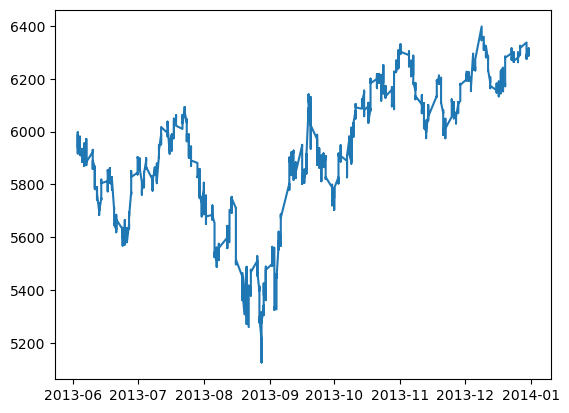

In [220]:
plt.plot(df_copy['date(Y/M/D)'],df_copy['Close'])

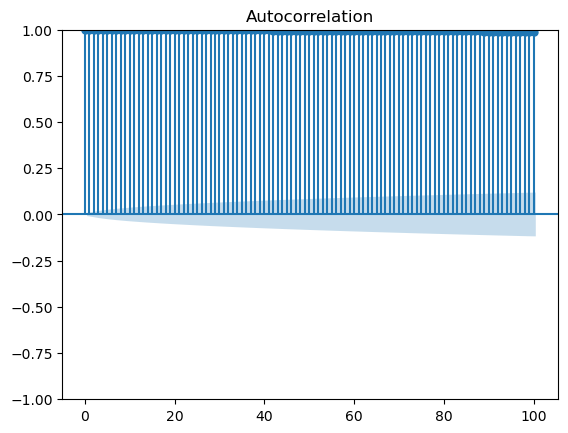

In [217]:
acf= plot_acf(df_copy['Open'], lags= 100)

In [224]:
df=df_copy['Close'].diff().dropna()

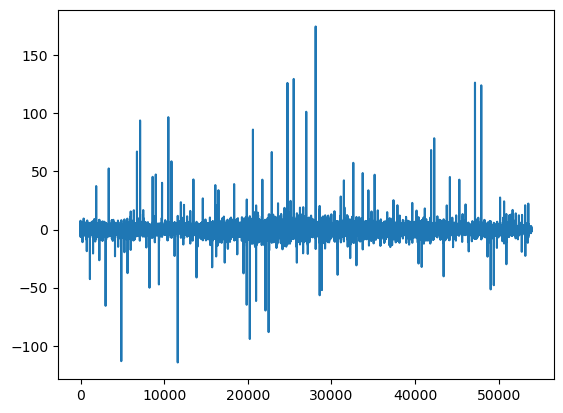

In [225]:
plt.plot(df)

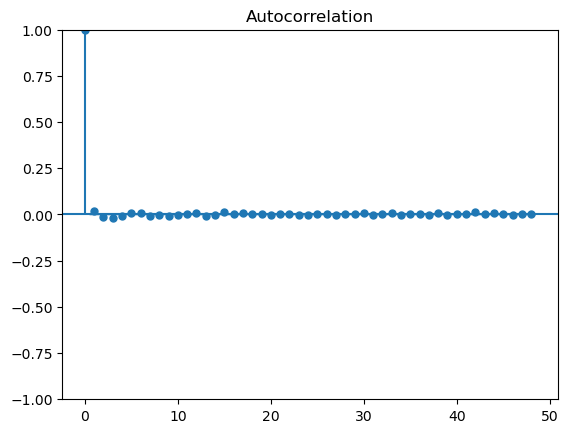

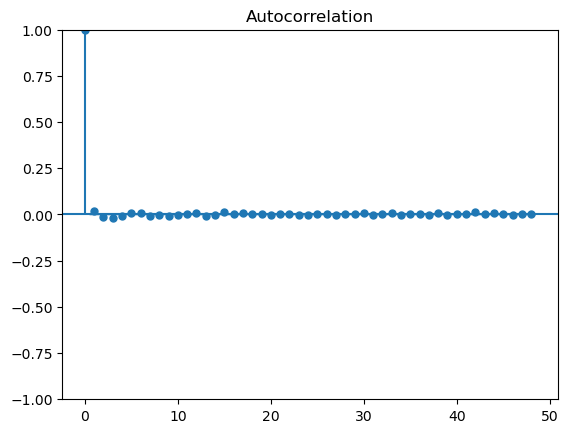

In [227]:
plot_acf(df)

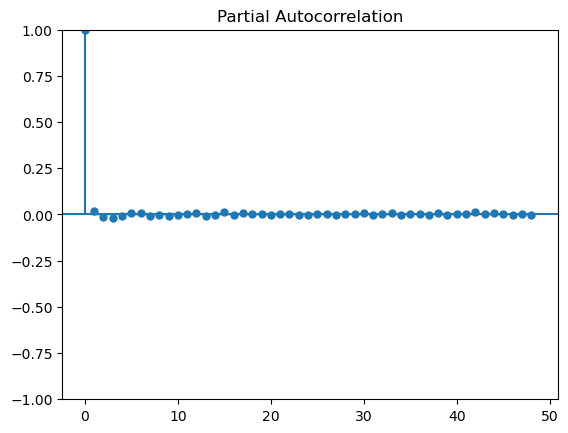

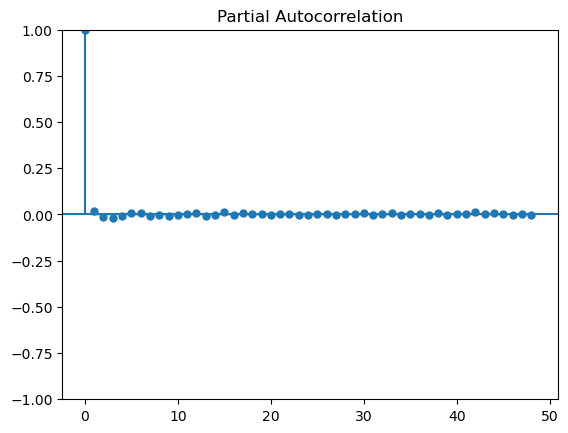

In [228]:
plot_pacf(df)